# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
df = pd.read_csv('heart.csv')

*Deskripsi Data*  
- *Sumber*: UCI Heart Disease Dataset (atau Kaggle Heart Disease UCI)  
- *Jumlah Sampel*: 1.025 baris  
- *Fitur (14 kolom)*:  
    1. Fitur (14 kolom):
    2. age (int) – usia pasien
    3. sex – jenis kelamin pasien (0 = perempuan, 1 = laki-laki)
    4. cp – jenis nyeri dada (0–3)
    5. trestbps – tekanan darah saat istirahat (resting blood pressure)
    6. chol – kadar kolesterol dalam serum
    7. fbs – kadar gula darah puasa > 120 mg/dl (0 = tidak, 1 = ya)
    8. restecg – hasil elektrokardiogram saat istirahat (0–2)
    9. thalach – detak jantung maksimum yang dicapai
    10. exang – angina yang diinduksi oleh olahraga (0 = tidak, 1 = ya)
    11. oldpeak – tingkat depresi segmen ST akibat latihan
    12. slope – kemiringan segmen ST saat puncak latihan (0–2)
    13. ca – jumlah pembuluh darah utama yang terlihat (0–3)
    14. thal – kondisi thalassemia (1 = normal, 2 = cacat tetap, 3 = cacat reversibel)
    15. target – label kondisi pasien (0 = sehat, 1 = memiliki penyakit jantung)  

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Karena dataset tidak mengandung missing value atau data duplikat, serta semua data sudah memiliki tipe numerik, proses dapat dilanjutkan ke tahap scaling.

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Berdasarkan informasi yang diberikan bahwa terdapat 4 kolom yang memiliki rentang min dan max yang cukup jauh sehingga harus di scaling agar sama rata dengan kolom lainnya

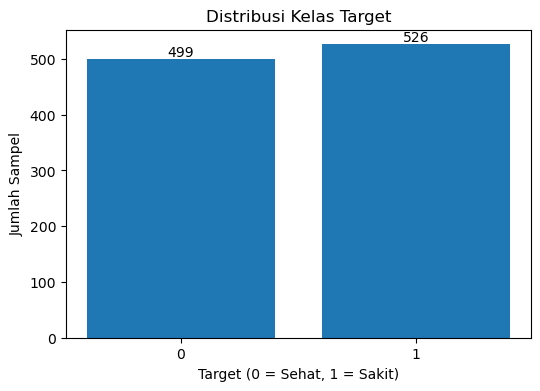

In [7]:
# 2. Plot distribusi dengan bar chart
counts = df['target'].value_counts().sort_index()
labels = counts.index.astype(str)

plt.figure(figsize=(6,4))
plt.bar(labels, counts.values)
plt.title('Distribusi Kelas Target')
plt.xlabel('Target (0 = Sehat, 1 = Sakit)')
plt.ylabel('Jumlah Sampel')
for i, v in enumerate(counts.values):
    plt.text(i, v + max(counts.values)*0.01, str(v), ha='center')
plt.show()

Terdapat 449 data dengan label 0 dan 526 data dengan label 1, yang menunjukkan bahwa distribusi data cukup seimbang dan stabil.

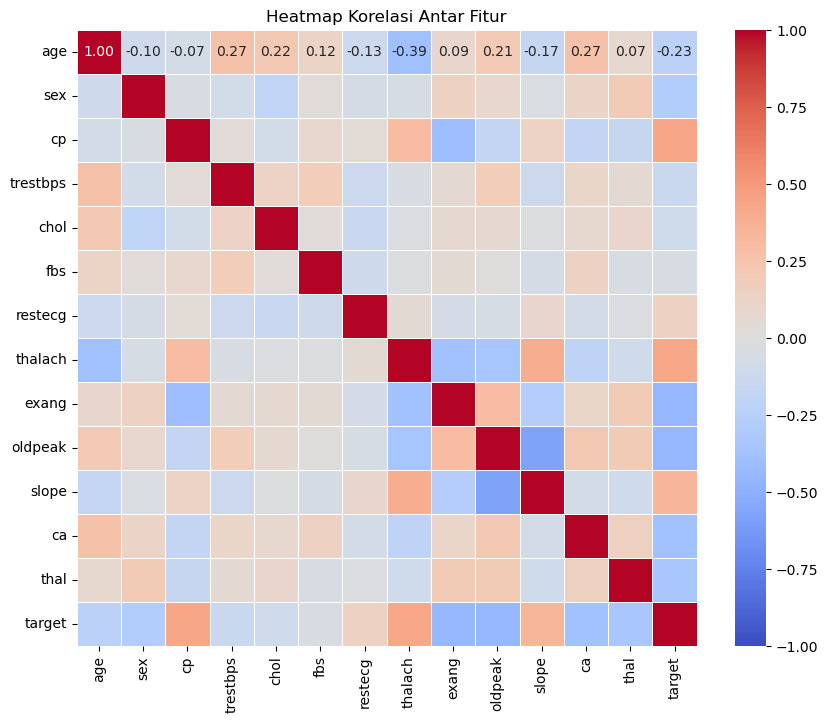

In [8]:
correlation_matrix = df.corr()

# 2. Plot heatmap korelasi
plt.figure(figsize=(10, 8))  # Ukuran gambar
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

1. **Korelasi Positif Signifikan**:
   - Fitur seperti `cp`, `thalach`, dan `exang` memiliki korelasi positif dengan target, menunjukkan hubungan yang jelas dengan peningkatan risiko penyakit jantung.

2. **Korelasi Negatif Signifikan**:
   - Fitur seperti `oldpeak` dan `ca` memiliki korelasi negatif dengan target, di mana penurunan nilai fitur-fitur ini mengindikasikan peningkatan risiko penyakit jantung.

3. **Korelasi Antar Fitur**:
   - Korelasi negatif antara `slope` dan `oldpeak` serta korelasi negatif antara `age` dan `thalach` memberi wawasan penting tentang interaksi antar faktor risiko.

4. **Korelasi Rendah**:
   - Fitur seperti `trestbps`, `chol`, `fbs`, dan `sex` menunjukkan korelasi rendah dengan target, namun tetap memberikan informasi tambahan untuk model.

# Data Scaling

In [9]:
scaler = StandardScaler()

# Melakukan scaling pada kolom yang diperlukan
df['age'] = scaler.fit_transform(df[['age']])
df['trestbps'] = scaler.fit_transform(df[['trestbps']])
df['chol'] = scaler.fit_transform(df[['chol']])
df['thalach'] = scaler.fit_transform(df[['thalach']])

# Melihat hasilnya
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,1.0,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,3.1,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,2.6,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,0.0,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,1.9,1,3,2,0


Proses scaling dilakukan dengan menggunakan **StandardScaler()** pada empat kolom yang memiliki rentang nilai yang sangat berbeda, untuk menormalkan data agar memiliki skala yang seragam.

# Split Data

In [10]:
X = df.drop(['target'], axis=1)
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Data dibagi menjadi 80:20, 20% untuk data testing sementar 80% untuk data training

# Model dan Evaluasi

## LightGBM

## Decision tree

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Training model dengan data training
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Proses awal pemodelan dilakukan dengan menggunakan algoritma Decision Tree, dengan penetapan random state sebesar 42 untuk memastikan konsistensi hasil setiap kali model dijalankan.

In [12]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',  # Karena ini adalah masalah klasifikasi biner
    'metric': 'binary_error',  # Kita menggunakan error sebagai metric
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree (GBDT)
    'num_leaves': 31,  # Jumlah leaves dalam tree
    'learning_rate': 0.1,  # Learning rate
    'feature_fraction': 0.9,  # Persentase fitur yang dipilih untuk tiap iterasi
}

bst = lgb.train(params,
                train_data,
                valid_sets=[test_data],  # Data validasi
                num_boost_round=100,  # Jumlah iterasi
                callbacks=[lgb.early_stopping(stopping_rounds=50)]) # Jika tidak ada peningkatan dalam 50 iterasi, pelatihan dihentikan

[LightGBM] [Info] Number of positive: 421, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513415 -> initscore=0.053671
[LightGBM] [Info] Start training from score 0.053671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

+ "Number of positive: 421, number of negative: 399": Ini menunjukkan jumlah data positif dan negatif dalam dataset pelatihan.
+ "Auto-choosing row-wise multi-threading": LightGBM secara otomatis memilih penggunaan multi-threading berbasis baris.
+ "Total Bins 362": Jumlah bin (keranjang) untuk pemisahan fitur.
+ "Number of data points in the train set: 820": Jumlah total data yang digunakan untuk pelatihan.
+ "Best iteration: 40": Iterasi terbaik yang dipilih selama pelatihan, dengan error validasi terbaik dicapai pada iterasi ini.

# Evaluasi

In [14]:
y_pred_lgb = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary_lgb = (y_pred_lgb >= 0.5).astype(int)
accuracy_tuned = accuracy_score(y_test, y_pred_binary_lgb)
print(f'🟢 Akurasi Lightgbm: {accuracy_tuned:.4f}')
print('🟢 Classification Report Lightgbm:')
print(classification_report(y_test, y_pred_binary_lgb))


y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Untuk ROC
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'🟢 Akurasi Decision Tree: {accuracy_dt:.4f}')
print('🟢 Classification Report Decision Tree:')
print(classification_report(y_test, y_pred_dt))

🟢 Akurasi Lightgbm: 1.0000
🟢 Classification Report Lightgbm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

🟢 Akurasi Decision Tree: 0.9854
🟢 Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



- **LightGBM**  
  - Akurasi **100%**, semua metrik = 1.00 → performa sempurna pada data uji (perlu dicek potensi overfitting).

- **Decision Tree**  
  - Akurasi **99%**, precision/recall/f1-score → performa sangat baik dan cenderung lebih general.

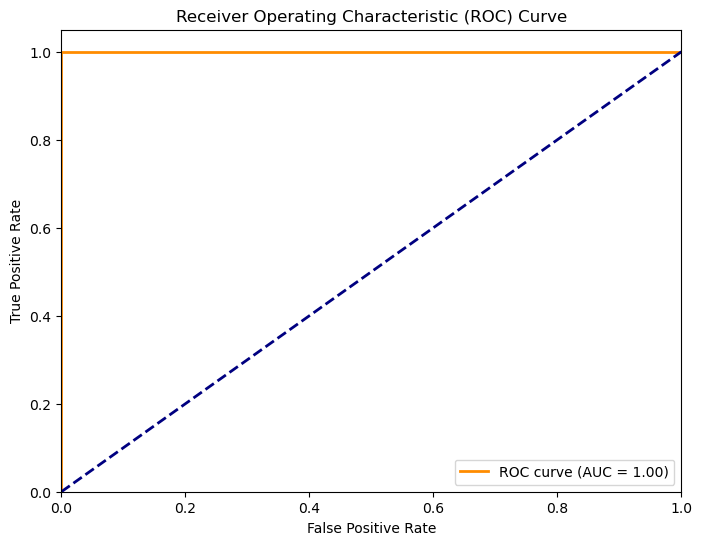

In [15]:
# Menghitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgb)

# Menghitung AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

kurva menunjukkan garis AUC yang sempurna yaitu 1.0

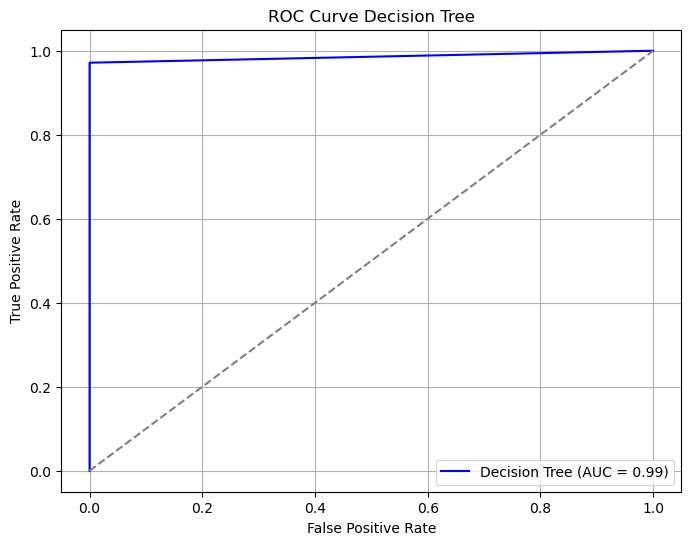

In [16]:
# Hitung ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree')
plt.legend()
plt.grid()
plt.show()

Garis AUC mendekati 1.0 (0.99) yang menandakan bahwa pemisahan dilakukan dengan baik anatara kelas positif dan negatif